In [ ]:
"""
Exploratory Data Analysis (EDA) for NSW Real Estate Price Prediction

This script performs basic exploratory data analysis on the cleaned and
feature-engineered dataset to understand data characteristics, distribution,
and relationships between features.

Key analyses include:
- Summary statistics and missing values check
- Missing data visualization with heatmap
- Distribution plots of sale price and log-transformed sale price
- Count plot of top suburbs by number of sales
- Box plot to compare sale prices by property description
- Correlation heatmap to identify relationships among numeric features

These insights help inform feature selection and modeling strategies.

Author: Ambarish Shashank Gadgil
Date: 2025-07-04
"""

import pandas as pd


df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_1/real_estate_price_prediction/data/processed/feature_engineered_data.csv')



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns



In [23]:
#Basic Info

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121917 entries, 0 to 121916
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Street_Name          121917 non-null  object 
 1   Suburb               121917 non-null  object 
 2   Postcode             121917 non-null  float64
 3   Sale_Price           121917 non-null  float64
 4   Description          121917 non-null  object 
 5   Address              121917 non-null  object 
 6   Sale_Year            121917 non-null  int64  
 7   Sale_Month           121917 non-null  int64  
 8   Sale_Weekday         121917 non-null  int64  
 9   Log_Sale_Price       121917 non-null  float64
 10  Property_Use_R       121917 non-null  bool   
 11  Property_Use_V       121917 non-null  bool   
 12  Season_Spring        121917 non-null  bool   
 13  Season_Summer        121917 non-null  bool   
 14  Season_Winter        121917 non-null  bool   
 15  Suburb_encoded   

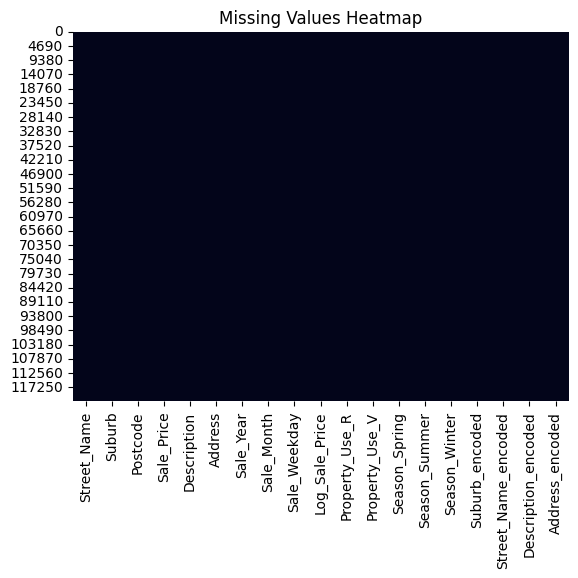

In [24]:
#Missing values heatmap

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

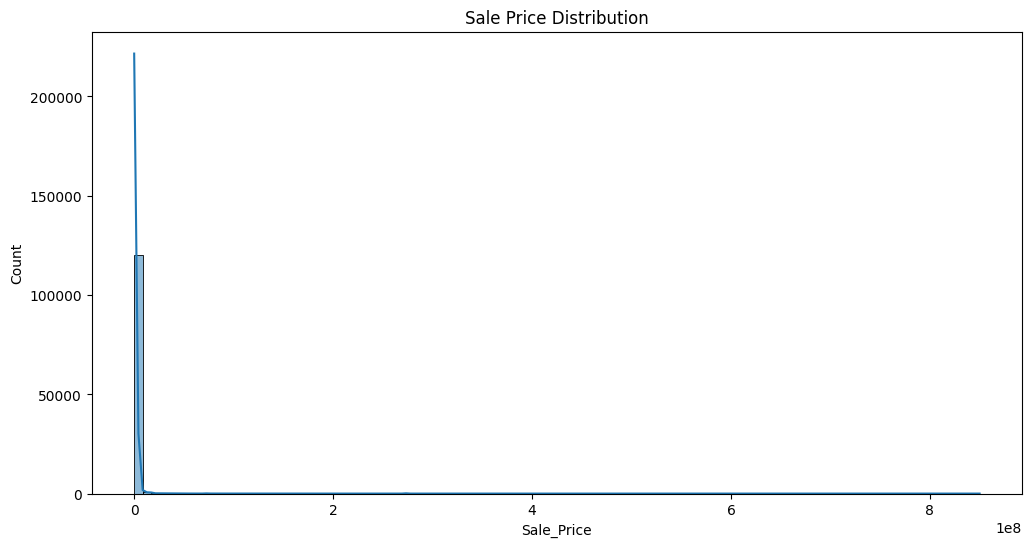

In [25]:
#Sale Price Distribution

plt.figure(figsize=(12,6))
sns.histplot(df['Sale_Price'],bins=100,kde=True)
plt.title("Sale Price Distribution")
plt.show()

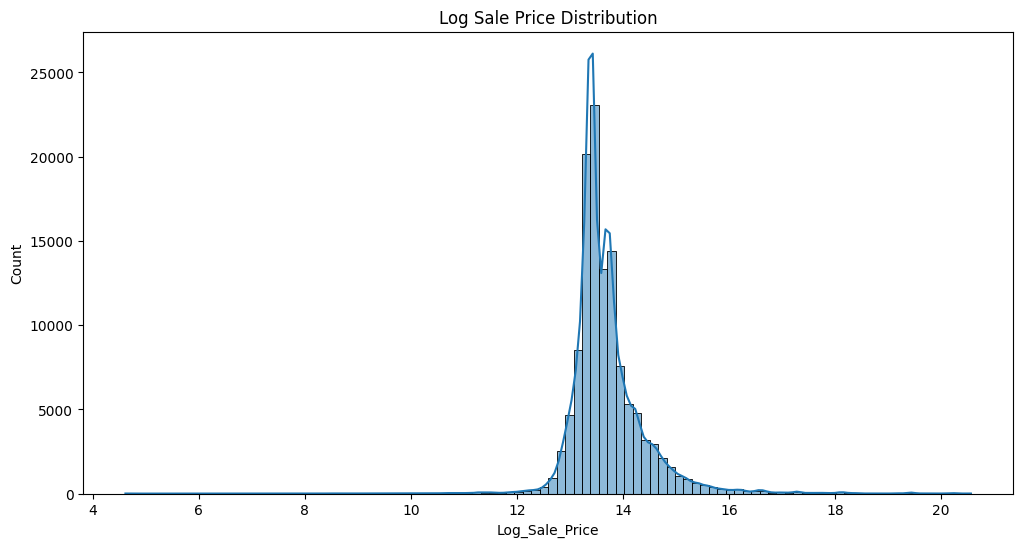

In [26]:
#Distribution for log of sale price

plt.figure(figsize=(12,6))
sns.histplot(df['Log_Sale_Price'], bins=100, kde=True)
plt.title("Log Sale Price Distribution")
plt.show()


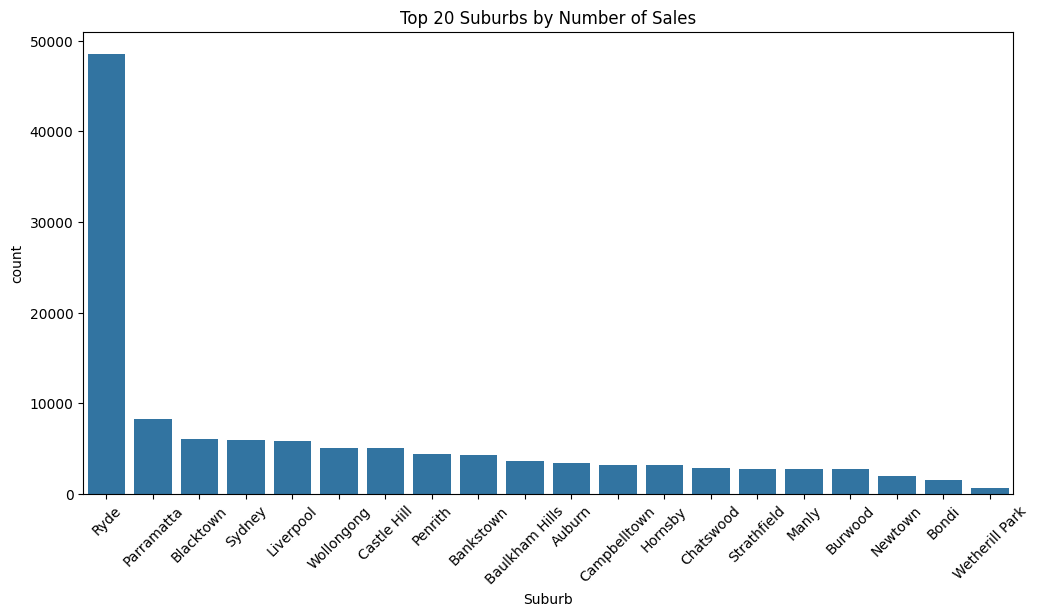

In [27]:
#Count plot for suburbs

plt.figure(figsize=(12,6))
top_suburbs=df['Suburb'].value_counts().nlargest(20).index
sns.countplot(data=df[df['Suburb'].isin(top_suburbs)],x='Suburb',order=top_suburbs)
plt.xticks(rotation=45)
plt.title("Top 20 Suburbs by Number of Sales")
plt.show()

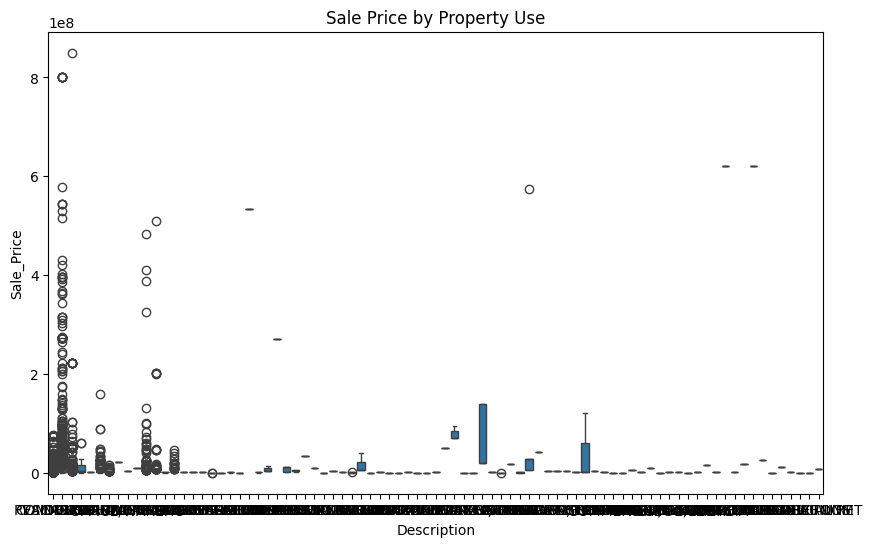

In [28]:
#Box plot of sale price by property use
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Description', y='Sale_Price')
plt.title("Sale Price by Property Use")
plt.show()


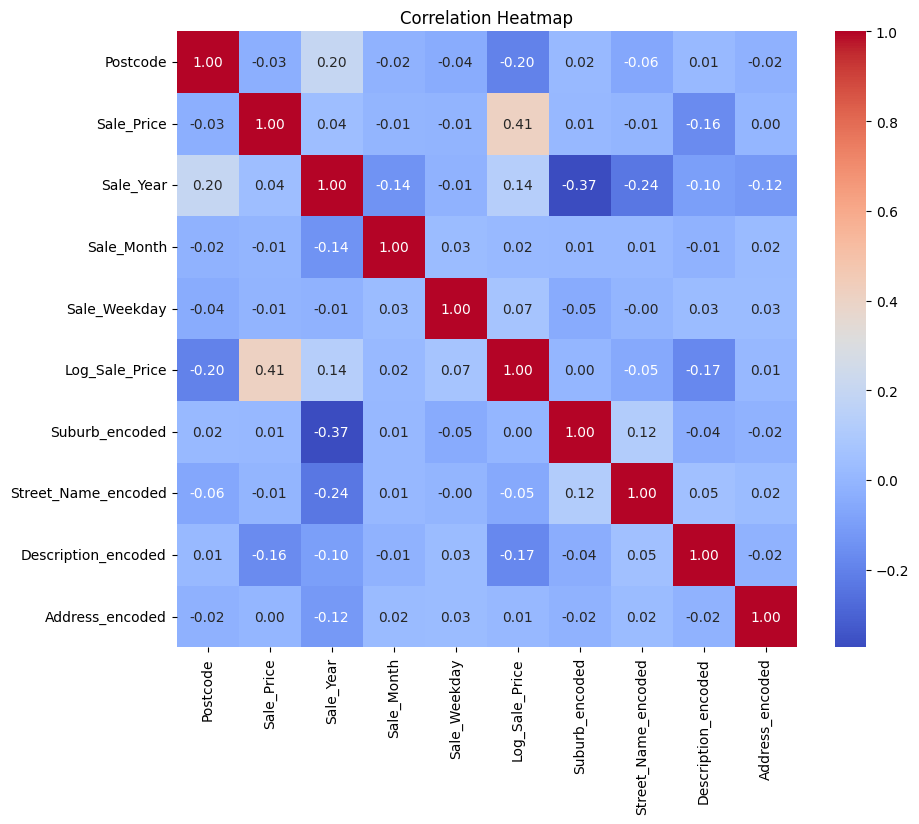

In [29]:
#Correlation heatmap for numeric features

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

#Compute Correlation and plot
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()